Silhouette Score: 0.010


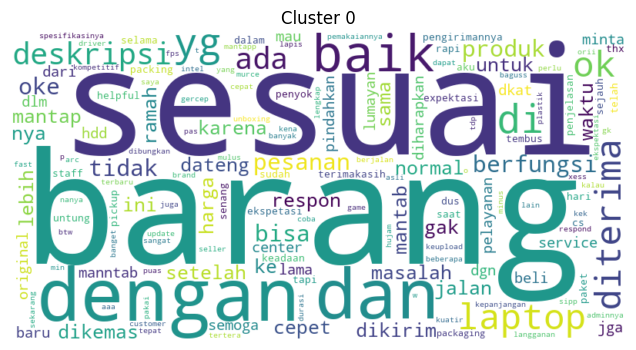

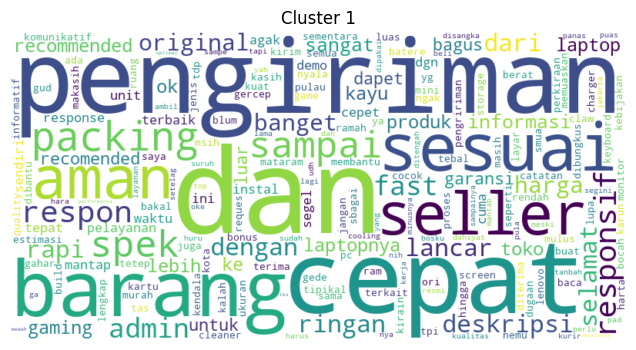

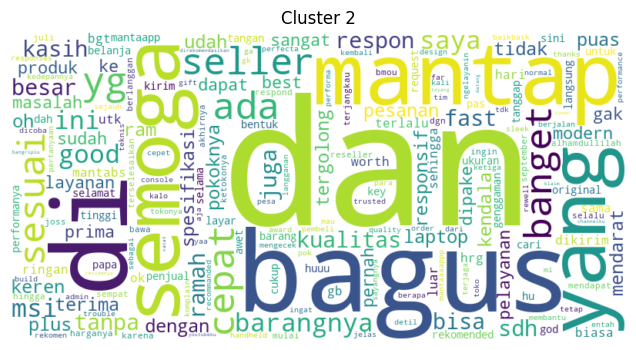

✅ Clustered reviews saved to ../outputs/clustered_reviews.csv


In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# 📥 Load cleaned reviews
df = pd.read_csv("../outputs/cleaned_reviews.csv")

# 🧹 Prepare Indonesian stopwords
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

# ✨ TF-IDF Vectorization (with Indonesian stopwords)
tfidf = TfidfVectorizer(max_features=3000, stop_words=stopwords)
X = tfidf.fit_transform(df['cleaned_review'])

# 🔢 K-Means Clustering
k = 3
model = KMeans(n_clusters=k, random_state=42, n_init=10)
df['cluster'] = model.fit_predict(X)

# 📊 Evaluate clustering
score = silhouette_score(X, df['cluster'])
print(f"Silhouette Score: {score:.3f}")

# ☁️ WordCloud per cluster
for c in range(k):
    text = " ".join(df[df['cluster'] == c]['cleaned_review'])
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        collocations=False
    ).generate(text)

    plt.figure(figsize=(8, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Cluster {c}")
    plt.show()

# 💾 Save results
df.to_csv("../outputs/clustered_reviews.csv", index=False)
print("✅ Clustered reviews saved to ../outputs/clustered_reviews.csv")